## Observations and Insights 

In [13]:
# 1) It seems Capomulin and Ramicine have the least amount of deaths during trials. According to this data all the mice were able to complete their treatments.
# 2) Capomulin and Ramicine were able to reduce the tumor size the best out of all the drugs in these trials according the the boxplot data.
# 3) The more weight a mouse has correlates with the amount of tumor growth they experience.


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pandas.core.frame import DataFrame
from typing import List

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
mice_group = len(mouse_study_df.groupby(['Mouse ID']))


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = mouse_study_df[mouse_study_df.duplicated(['Mouse ID'])]
duplicate_mice_all.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_study_df.drop_duplicates('Mouse ID')
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [19]:
# Checking the number of mice in the clean DataFrame.

clean_mice_num = clean_mice_df['Mouse ID'].count()
print(clean_mice_num)

249


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.  

mean = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dev = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_mouse_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': standard_dev, 'SEM': sem})
summary_mouse_df.head()

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_mouse_df = mouse_study_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).aggregate(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Std_Dev= ('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)

print(aggregate_mouse_df)

                   Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

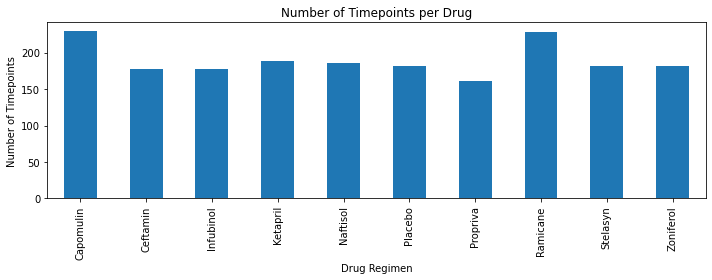

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_id = mouse_study_df.groupby('Drug Regimen')['Timepoint'].count()

# Create bar plot and labels.
regimen_id = regimen_id.plot.bar(title='Number of Timepoints per Drug', figsize=(10, 4))
regimen_id.set_xlabel('Drug Regimen')
regimen_id.set_ylabel('Number of Timepoints')

plt.savefig('images/pandas_timepoints.png')
plt.tight_layout()

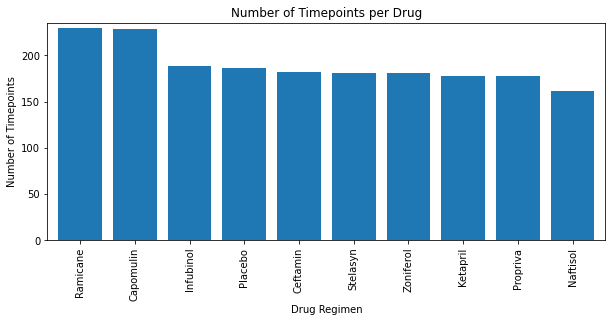

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create x axis & y axis.
drug_axis = mouse_study_df['Drug Regimen'].unique()
timepoints_axis = mouse_study_df['Drug Regimen'].value_counts()

# Plot bar graph & edit.
plt.figure(figsize=(10, 4))

plt.bar(drug_axis,timepoints_axis)
plt.xticks(drug_axis, rotation=90)
plt.xlim(-0.6, len(drug_axis)-.4)
plt.ylim(0, max(timepoints_axis)+5)
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.title('Number of Timepoints per Drug')
plt.savefig('images/pyplot_timepoints.png')
plt.show()

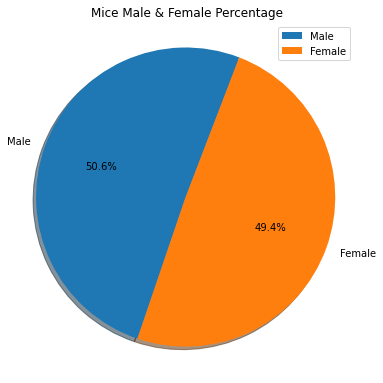

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender_count = pd.value_counts(mouse_study_df['Sex'])

#pandas pie plot
plt.figure(figsize=(6,6.5))

mouse_gender_pd = mouse_gender_count.plot(kind='pie', y='sex', startangle = 69, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Mice Male & Female Percentage')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='best')
plt.savefig('images/pandas_distribution.png')
plt.show()

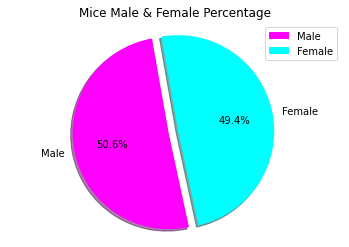

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_count, 
    labels=['Male','Female'],
    autopct='%1.1f%%',
    colors=['magenta','cyan'],
    startangle=100,
    shadow=True,
    explode=(0.1, 0)
)

plt.axis('equal')
plt.title('Mice Male & Female Percentage')
plt.legend(loc='best')
plt.savefig('images/pyplot_distribution.png')
plt.show()


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_tp = pd.DataFrame(mouse_study_df.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(mouse_greatest_tp, mouse_study_df, on=('Mouse ID', 'Timepoint'), how='left')

clean_merged_mouse_df = merged_mouse_df[merged_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

clean_merged_mouse_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


['Infubinol', 54.04860769, 65.52574285, 11.477135160000003, 36.83290494999999, 82.74144559000001]
['Ceftamin', 48.72207785, 64.29983003, 15.577752179999997, 25.355449580000002, 87.66645829999999]
['Ramicane', 31.56046955, 40.65900627, 9.098536719999998, 17.912664470000003, 54.30681135]
['Capomulin', 32.37735684, 40.1592203, 7.781863460000004, 20.70456164999999, 51.83201549]


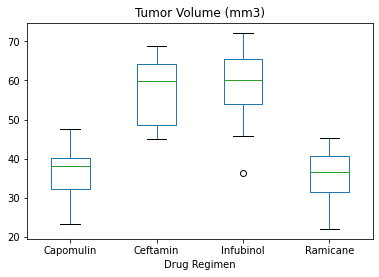

In [36]:
# Put treatments into a list for for loop (and later for plot labels)
pills = clean_merged_mouse_df['Drug Regimen'].unique()

# Create class to be used to pull pill name and tumor data from the dataframe.
class pill_data:
    def __init__(self, name: str, data: DataFrame) -> None:
        self.name: str = name
        self.data: DataFrame = data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds

# Empty list for boxplot. 
data_list: List[pill_data] = []
# Empty list for math calculations.
tumor_math = []
# Setup the for loop.
for pill in pills:
    # Hold data when drug pill == drug pill
    pill_df = clean_merged_mouse_df.loc[clean_merged_mouse_df['Drug Regimen']==pill]
    # Pull drug & tumor data from the data being held.
    tumor_data: DataFrame = pill_df[['Drug Regimen', 'Tumor Volume (mm3)']]
    # Hold drug & tumor data.
    new_pill = pill_data(pill, tumor_data)
    # Append boxplot list with drug & tumor data.
    data_list.append(new_pill)
    # Mathimatical!
    quartiles = pill_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Append tumor list with the new values..
    tumor_math.append([pill, lowerq, upperq, iqr, lower_bound, upper_bound])

# Display IQR and Outliers.
for pill in tumor_math:
    print(pill)

# Create the boxplot!
bp: plt.boxplot = clean_merged_mouse_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)
plt.suptitle('')
plt.savefig('images/tumor_volume.png')
plt.show()

## Line and Scatter Plots

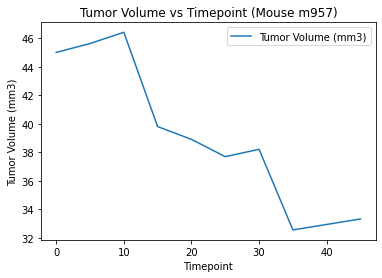

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Group data for Capomulin, then pull data for mouse m957.
capomulin_mouse = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').get_group('m957')
# Create line plot.
capomulin_mouse.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint (Mouse m957)')
plt.savefig('images/tumor_timepoint.png')
plt.show()


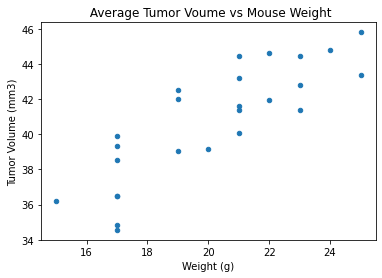

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Find mean for Capomulin.
capomulin_avg = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()
# Create scatter plot.
capomulin_avg.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.title(' Average Tumor Voume vs Mouse Weight')
plt.savefig('images/avgtumor_weight.png')
plt.show()

## Correlation and Regression

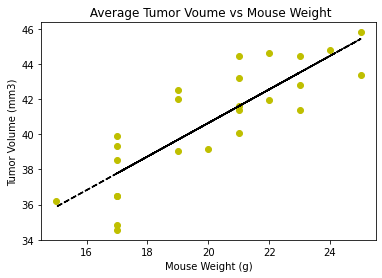

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Create X & Y values.
x_val = capomulin_avg["Weight (g)"]
y_val = capomulin_avg["Tumor Volume (mm3)"]
# Create function that takes X values and returns estimate for y.
coefficient = np.polyfit(x_val, y_val, 1)
poly_fn = np.poly1d(coefficient)
# Plot liner regression model & format
plt.plot(x_val, y_val, 'yo', x_val, poly_fn(x_val), '--k')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(' Average Tumor Voume vs Mouse Weight')
plt.savefig('images/avgtumor_linear_regression.png')
plt.show()